<a href="https://colab.research.google.com/github/rizky-gumelar/Comparison-of-ML-and-DL-in-Corrosion-Inhibitor/blob/main/ML_Benzimidazole2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dan Read Dataset

In [ ]:
#============== metric ===========================================
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===============
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import shuffle
import time
import pandas as pd
from pandas_dq import dq_report,Fix_DQ
#import pandas as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Imported pandas_dq (1.22). Always upgrade to get latest features.



## Load Dataset

In [ ]:
df = pd.read_excel('2015_benzimidazole_li_dataset.xlsx')
df.head()

,Inhibitor number,EHOMO/eV,ELUMO/eV,α/Bohr3,Qtotal/e,Vi/cm3mol-1,Ia/,Aa/,ωa/,ΔNa,ΛNICS(1)B,ΛNICS(1)I,IE exp (%)
0,1,-6.59,-0.99,92.50,-1.90,62.36,6.33,1.33,2.93,0.09,-11.12,-10.31,53.76
1,2,-8.19,-1.54,124.06,-2.32,80.33,6.37,4.08,11.94,-0.22,-10.81,-10.07,52.80
2,3,-6.43,-1.93,174.80,-2.90,105.50,6.13,2.33,4.71,-0.04,-10.50,-9.29,68.95
3,4,-6.31,-2.87,127.80,-3.28,81.06,5.96,3.26,7.89,-0.11,-9.60,-7.62,69.58
4,5,-6.02,-0.35,144.44,-3.92,95.21,4.79,1.00,2.22,0.30,-9.82,-7.46,97.99


## Report Dataset

In [ ]:
dq_report(df,verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Inhibitor number,int64,0.000000,100,1.000000,20.000000,Possible ID colum: drop before modeling process.
EHOMO/eV,float64,0.000000,NA,-9.300000,-6.010000,No issue
ELUMO/eV,float64,0.000000,NA,-3.020000,-0.350000,No issue
α/Bohr3,float64,0.000000,NA,92.500000,174.800000,has 1 outliers greater than upper bound (160.30374999999998) or lower than lower bound(83.43374999999999). Cap them or remove them.
Qtotal/e,float64,0.000000,NA,-3.920000,-1.900000,No issue
Vi/cm3mol-1,float64,0.000000,NA,62.360000,105.500000,"has 1 outliers greater than upper bound (100.01749999999998) or lower than lower bound(58.4975). Cap them or remove them., has a high correlation with ['α/Bohr3']. Consider dropping one of them."
Ia/,float64,0.000000,NA,4.750000,6.830000,No issue
Aa/,float64,0.000000,NA,1.000000,4.080000,has a high correlation with ['ELUMO/eV']. Consider dropping one of them.
ωa/,float64,0.000000,NA,2.220000,11.940000,"has 1 outliers greater than upper bound (11.745000000000001) or lower than lower bound(-3.0350000000000015). Cap them or remove them., has a high correlation with ['Aa/']. Consider dropping one of them."
ΔNa,float64,0.000000,NA,-0.250000,0.300000,"has a high correlation with ['ELUMO/eV', 'Ia/', 'Aa/', 'ωa/']. Consider dropping one of them."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Inhibitor number,int64,0.0,100,1.00,20.00,Possible ID colum: drop before modeling process.
EHOMO/eV,float64,0.0,NA,-9.30,-6.01,No issue
ELUMO/eV,float64,0.0,NA,-3.02,-0.35,No issue
α/Bohr3,float64,0.0,NA,92.50,174.80,has 1 outliers greater than upper bound (160.30374999999998) or lower than lower bound(83.43374999999999). Cap them or remove them.
Qtotal/e,float64,0.0,NA,-3.92,-1.90,No issue
Vi/cm3mol-1,float64,0.0,NA,62.36,105.50,"has 1 outliers greater than upper bound (100.01749999999998) or lower than lower bound(58.4975). Cap them or remove them., has a high correlation with ['α/Bohr3']. Consider dropping one of them."
Ia/,float64,0.0,NA,4.75,6.83,No issue
Aa/,float64,0.0,NA,1.00,4.08,has a high correlation with ['ELUMO/eV']. Consider dropping one of them.
ωa/,float64,0.0,NA,2.22,11.94,"has 1 outliers greater than upper bound (11.745000000000001) or lower than lower bound(-3.0350000000000015). Cap them or remove them., has a high correlation with ['Aa/']. Consider dropping one of them."
ΔNa,float64,0.0,NA,-0.25,0.30,"has a high correlation with ['ELUMO/eV', 'Ia/', 'Aa/', 'ωa/']. Consider dropping one of them."


## Definisi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inhibitor number  20 non-null     int64  
 1   EHOMO/eV          20 non-null     float64
 2   ELUMO/eV          20 non-null     float64
 3   α/Bohr3           20 non-null     float64
 4   Qtotal/e          20 non-null     float64
 5   Vi/cm3mol-1       20 non-null     float64
 6   Ia/               20 non-null     float64
 7   Aa/               20 non-null     float64
 8   ωa/               20 non-null     float64
 9   ΔNa               20 non-null     float64
 10  ΛNICS(1)B         20 non-null     float64
 11  ΛNICS(1)I         20 non-null     float64
 12  IE exp (%)        20 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 2.2 KB


In [ ]:
df.isnull().sum()

Inhibitor number    0
EHOMO/eV            0
ELUMO/eV            0
α/Bohr3             0
Qtotal/e            0
Vi/cm3mol-1         0
Ia/                 0
Aa/                 0
ωa/                 0
ΔNa                 0
ΛNICS(1)B           0
ΛNICS(1)I           0
IE exp (%)          0
dtype: int64

In [ ]:
# Preprosessing
df.columns

Index(['Inhibitor number', 'EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/e',
       'Vi/cm3mol-1', 'Ia/', 'Aa/', 'ωa/', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I',
       'IE exp (%)'],
      dtype='object')

In [ ]:
# melihat apakah ada data yang memiliki nilai yang hilang atau nol
print(df.isnull().any())

Inhibitor number    False
EHOMO/eV            False
ELUMO/eV            False
α/Bohr3             False
Qtotal/e            False
Vi/cm3mol-1         False
Ia/                 False
Aa/                 False
ωa/                 False
ΔNa                 False
ΛNICS(1)B           False
ΛNICS(1)I           False
IE exp (%)          False
dtype: bool


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew()

Inhibitor number    0.000000
EHOMO/eV           -0.145277
ELUMO/eV           -1.117023
α/Bohr3             0.935807
Qtotal/e           -0.238566
Vi/cm3mol-1         0.680092
Ia/                -0.565394
Aa/                 0.853059
ωa/                 1.413147
ΔNa                -0.388817
ΛNICS(1)B           0.795112
ΛNICS(1)I           0.183003
IE exp (%)          0.514508
dtype: float64

# EDA 1

## EDA EHOMO/eV

Range EHOMO/eV: 3.290000000000001


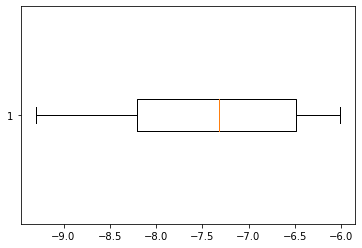

In [ ]:
# melihat range pada kolom numerik 'EHOMO/eV'
print('Range EHOMO/eV:', df['EHOMO/eV'].max() - df['EHOMO/eV'].min())

# membuat box plot pada kolom numerik 'EHOMO/eV'
plt.boxplot(df['EHOMO/eV'],vert=False)
plt.show()

## EDA ELUMO/eV

Range ELUMO/eV: 2.67


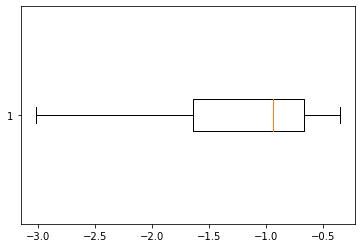

In [ ]:
# melihat range pada kolom numerik 'ELUMO/eV'
print('Range ELUMO/eV:', df['ELUMO/eV'].max() - df['ELUMO/eV'].min())

# membuat box plot pada kolom numerik 'ELUMO/eV'
plt.boxplot(df['ELUMO/eV'],vert=False)
plt.show()

## EDA α/Bohr3

Range α/Bohr3: 82.30000000000001


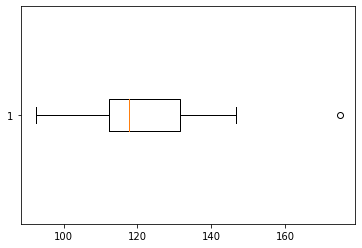

In [ ]:
# melihat range pada kolom numerik 'α/Bohr3'
print('Range α/Bohr3:', df['α/Bohr3'].max() - df['α/Bohr3'].min())

# membuat box plot pada kolom numerik 'α/Bohr3'
plt.boxplot(df['α/Bohr3'],vert=False)
plt.show()

## EDA Qtotal/e

Range Qtotal/e: 2.02


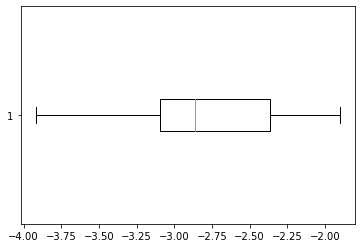

In [ ]:
# melihat range pada kolom numerik 'Qtotal/e'
print('Range Qtotal/e:', df['Qtotal/e'].max() - df['Qtotal/e'].min())

# membuat box plot pada kolom numerik 'Qtotal/e'
plt.boxplot(df['Qtotal/e'],vert=False)
plt.show()

## EDA Vi/cm3mol-1

Range Vi/cm3mol-1: 43.14


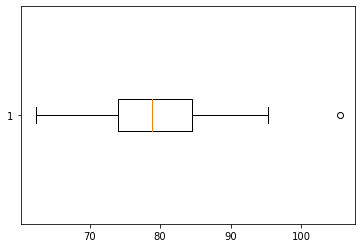

In [ ]:
# melihat range pada kolom numerik 'Vi/cm3mol-1'
print('Range Vi/cm3mol-1:', df['Vi/cm3mol-1'].max() - df['Vi/cm3mol-1'].min())

# membuat box plot pada kolom numerik 'Vi/cm3mol-1'
plt.boxplot(df['Vi/cm3mol-1'],vert=False)
plt.show()

## EDA Ia/

Range Ia/: 2.08


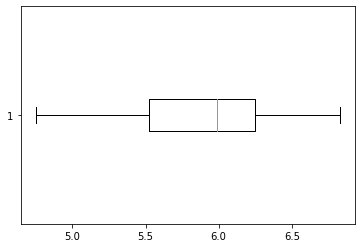

In [ ]:
# melihat range pada kolom numerik 'Ia/'
print('Range Ia/:', df['Ia/'].max() - df['Ia/'].min())

# membuat box plot pada kolom numerik 'Ia/'
plt.boxplot(df['Ia/'],vert=False)
plt.show()

## EDA Aa/

Range Aa/: 3.08


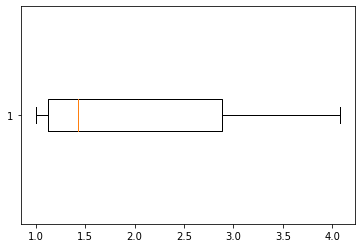

In [ ]:
# melihat range pada kolom numerik 'Aa/'
print('Range Aa/:', df['Aa/'].max() - df['Aa/'].min())

# membuat box plot pada kolom numerik 'Aa/'
plt.boxplot(df['Aa/'],vert=False)
plt.show()

## EDA ωa/

Range ωa/: 9.719999999999999


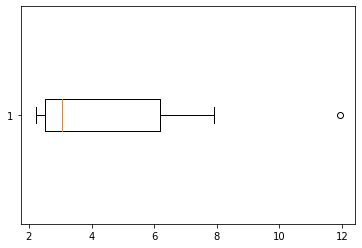

In [ ]:
# melihat range pada kolom numerik 'ωa/'
print('Range ωa/:', df['ωa/'].max() - df['ωa/'].min())

# membuat box plot pada kolom numerik 'ωa/'
plt.boxplot(df['ωa/'],vert=False)
plt.show()

## EDA ΔNa

Range ΔNa: 0.55


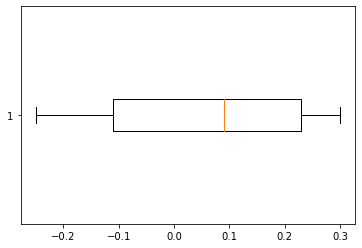

In [ ]:
# melihat range pada kolom numerik 'ΔNa'
print('Range ΔNa:', df['ΔNa'].max() - df['ΔNa'].min())

# membuat box plot pada kolom numerik 'ΔNa'
plt.boxplot(df['ΔNa'],vert=False)
plt.show()

## EDA ΛNICS(1)B

Range ΛNICS(1)B: 1.5500000000000007


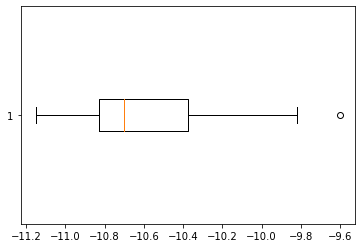

In [ ]:
# melihat range pada kolom numerik 'ΛNICS(1)B'
print('Range ΛNICS(1)B:', df['ΛNICS(1)B'].max() - df['ΛNICS(1)B'].min())

# membuat box plot pada kolom numerik 'ΛNICS(1)B'
plt.boxplot(df['ΛNICS(1)B'],vert=False)
plt.show()

## EDA ΛNICS(1)I

Range ΛNICS(1)I: 3.1799999999999997


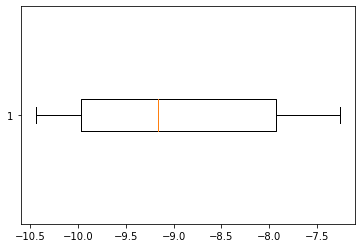

In [ ]:
# melihat range pada kolom numerik 'ΛNICS(1)I'
print('Range ΛNICS(1)I:', df['ΛNICS(1)I'].max() - df['ΛNICS(1)I'].min())

# membuat box plot pada kolom numerik 'ΛNICS(1)I'
plt.boxplot(df['ΛNICS(1)I'],vert=False)
plt.show()

## EDA IE exp (%)

Range IE exp (%): 52.92999999999999


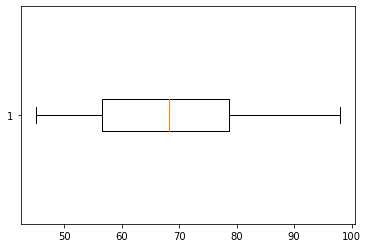

In [ ]:
# melihat range pada kolom numerik 'IE exp (%)'
print('Range IE exp (%):', df['IE exp (%)'].max() - df['IE exp (%)'].min())

# membuat box plot pada kolom numerik 'IE exp (%)'
plt.boxplot(df['IE exp (%)'],vert=False)
plt.show()

# MACHINE LEARNING

## Preposcessing Data

In [ ]:
scalling = StandardScaler()

In [ ]:
df.drop('Inhibitor number', axis=1, inplace=True)

In [ ]:
df

,EHOMO/eV,ELUMO/eV,α/Bohr3,Qtotal/e,Vi/cm3mol-1,Ia/,Aa/,ωa/,ΔNa,ΛNICS(1)B,ΛNICS(1)I,IE exp (%)
0,-6.59,-0.99,92.50,-1.90,62.36,6.33,1.33,2.93,0.09,-11.12,-10.31,53.76
1,-8.19,-1.54,124.06,-2.32,80.33,6.37,4.08,11.94,-0.22,-10.81,-10.07,52.80
2,-6.43,-1.93,174.80,-2.90,105.50,6.13,2.33,4.71,-0.04,-10.50,-9.29,68.95
3,-6.31,-2.87,127.80,-3.28,81.06,5.96,3.26,7.89,-0.11,-9.60,-7.62,69.58
4,-6.02,-0.35,144.44,-3.92,95.21,4.79,1.00,2.22,0.30,-9.82,-7.46,97.99
5,-6.01,-0.47,146.52,-3.92,95.21,4.75,1.04,2.26,0.30,-9.87,-7.26,97.79
6,-7.25,-3.02,111.81,-2.35,74.25,6.83,3.42,7.70,-0.25,-10.52,-10.44,50.77
7,-7.08,-1.18,131.26,-2.45,83.13,6.22,1.39,3.00,0.09,-10.79,-9.75,53.99
8,-7.32,-2.98,113.15,-2.37,74.25,6.81,3.35,7.47,-0.24,-10.59,-10.16,57.49
9,-6.34,-2.88,128.24,-3.32,81.06,5.95,3.27,7.92,-0.11,-9.99,-7.54,80.70


## Cek Korelasi

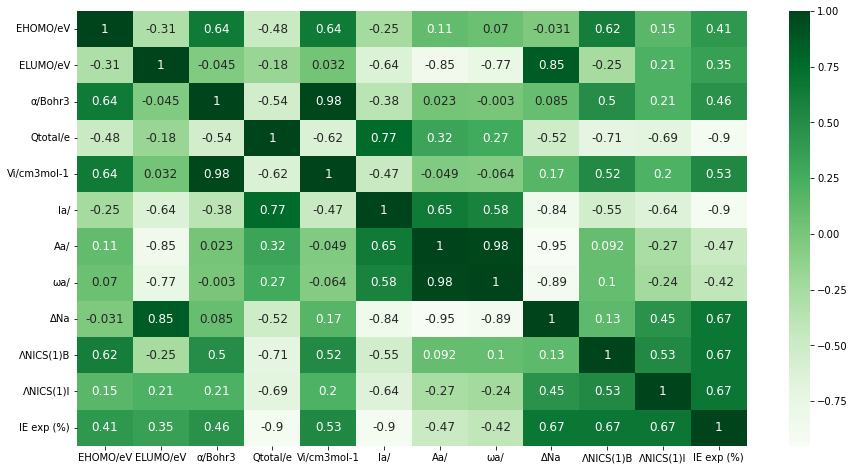

In [ ]:
matriksCorr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matriksCorr, cmap='Greens', annot=True, annot_kws={'fontsize': 12})

plt.show()

# Model Linear

## Model Linear Regression

Linear Regression Fold-1:
MSE: 6.842792245376783
MAE: 1.8868965940514333
RMSE: 2.615873132507917
R^2: 0.9718181922431671
------------------


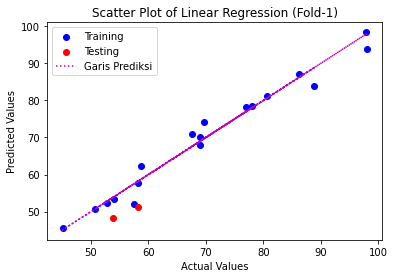

Linear Regression Fold-2:
MSE: 4.037058580354325
MAE: 1.7153413043239985
RMSE: 2.009243285506841
R^2: 0.9837359156823487
------------------


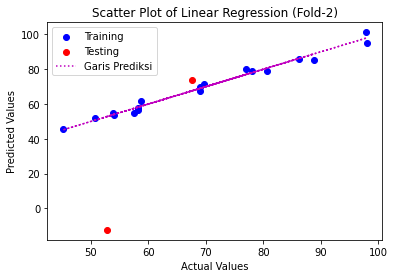

Linear Regression Fold-3:
MSE: 5.100295190515616
MAE: 1.8627996244542162
RMSE: 2.258383313460232
R^2: 0.9754168906286508
------------------


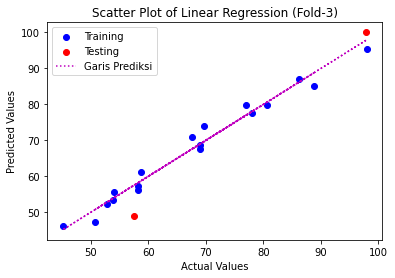

Linear Regression Fold-4:
MSE: 3.6636030177360928
MAE: 1.4977212618051563
RMSE: 1.9140540791043739
R^2: 0.9841178220232429
------------------


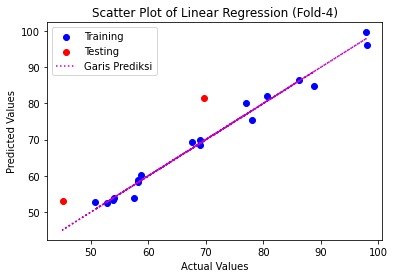

Linear Regression Fold-5:
MSE: 5.8097570520181065
MAE: 2.0390838309315997
RMSE: 2.410343762208641
R^2: 0.9770935871592543
------------------


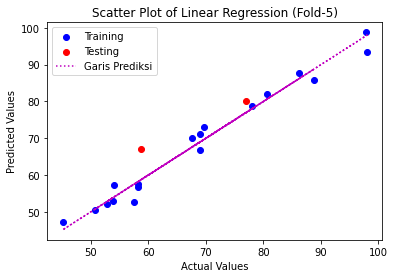

Linear Regression Fold-6:
MSE: 7.287810041383882
MAE: 2.082258572749349
RMSE: 2.6995944216463115
R^2: 0.9722720766233073
------------------


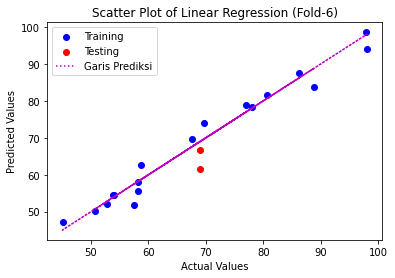

Linear Regression Fold-7:
MSE: 6.39902728649002
MAE: 1.981859499231832
RMSE: 2.529629871441674
R^2: 0.9727161074055364
------------------


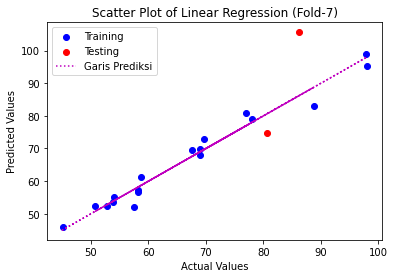

Linear Regression Fold-8:
MSE: 5.137107588060859
MAE: 1.8510060613715527
RMSE: 2.2665188258783244
R^2: 0.9752482854638236
------------------


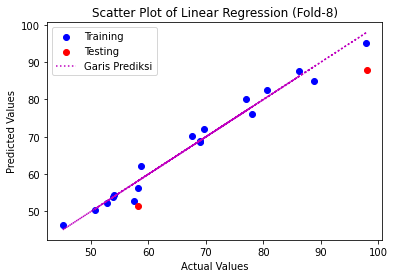

Linear Regression Fold-9:
MSE: 5.530451321531171
MAE: 1.6696209494600476
RMSE: 2.351691162021742
R^2: 0.9757744916778551
------------------


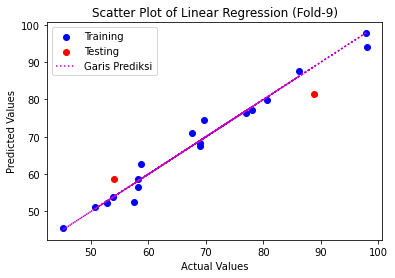

Linear Regression Fold-10:
MSE: 7.755941028591526
MAE: 2.1885178736747632
RMSE: 2.784949017233803
R^2: 0.9676998639071733
------------------


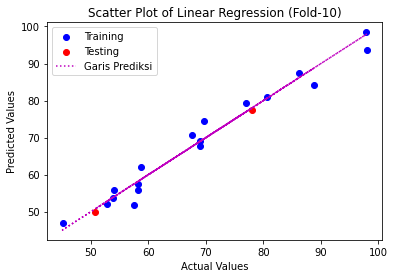

Rata-rata:
Mean MSE: 5.756384335205837
Mean MAE: 1.8775105572053945
Mean RMSE: 2.384028087100986
Mean R^2: 0.9755893232814359


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model LR
model_lr = LinearRegression()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_lr.fit(X_train, y_train)
    y_train_pred = model_lr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_lr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Linear Regression Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Linear Regression (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Ridge

Ridge Fold-1:
MSE: 25.158285147006975
MAE: 4.076768900174831
RMSE: 5.015803539514579
R^2: 0.8963864559846074
------------------


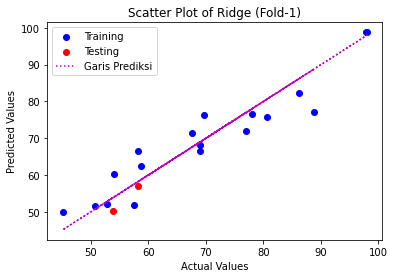

Ridge Fold-2:
MSE: 24.97185814947321
MAE: 3.943388942166898
RMSE: 4.99718502253751
R^2: 0.8993959591054997
------------------


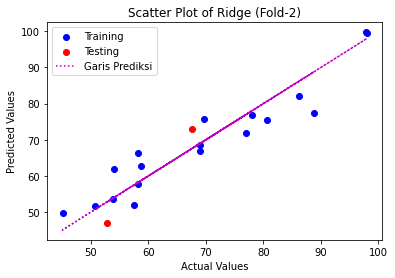

Ridge Fold-3:
MSE: 22.356905607828182
MAE: 3.8666912025675564
RMSE: 4.728308958584261
R^2: 0.8922410889502634
------------------


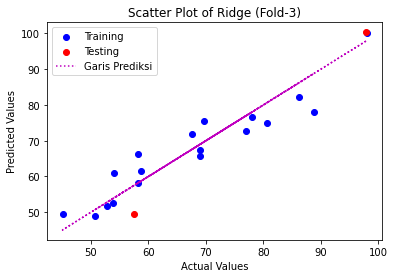

Ridge Fold-4:
MSE: 19.90451776080984
MAE: 3.465835405403252
RMSE: 4.461447944424527
R^2: 0.913711422310692
------------------


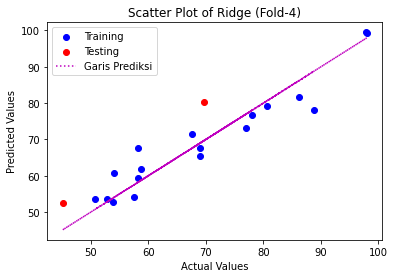

Ridge Fold-5:
MSE: 24.143134306935067
MAE: 3.843958371998462
RMSE: 4.913566353162952
R^2: 0.9048096853702133
------------------


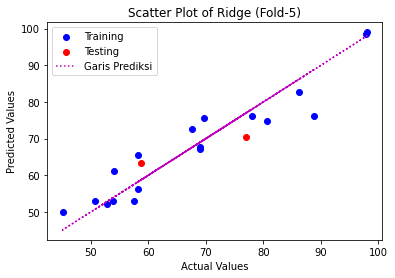

Ridge Fold-6:
MSE: 24.35492743693121
MAE: 3.8575341932976377
RMSE: 4.935071168375509
R^2: 0.9073368326038442
------------------


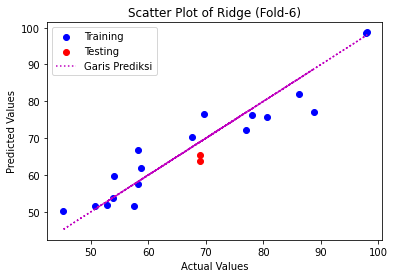

Ridge Fold-7:
MSE: 24.33869806903987
MAE: 3.8165005178847955
RMSE: 4.933426605214663
R^2: 0.8962257239617104
------------------


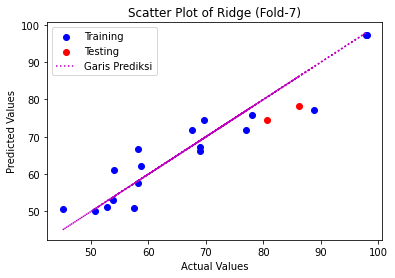

Ridge Fold-8:
MSE: 20.92256912446159
MAE: 3.7504897179838768
RMSE: 4.574119491712213
R^2: 0.899190458939254
------------------


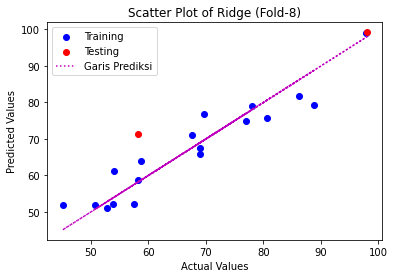

Ridge Fold-9:
MSE: 15.69231211832011
MAE: 3.215654987599839
RMSE: 3.9613523092903655
R^2: 0.9312616248268851
------------------


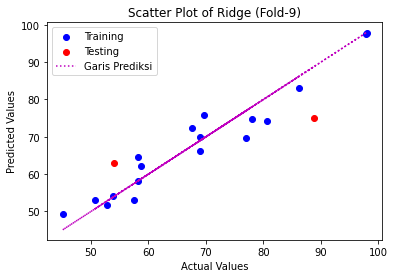

Ridge Fold-10:
MSE: 25.280082299529607
MAE: 4.001181831310244
RMSE: 5.027930220232736
R^2: 0.8947194033963729
------------------


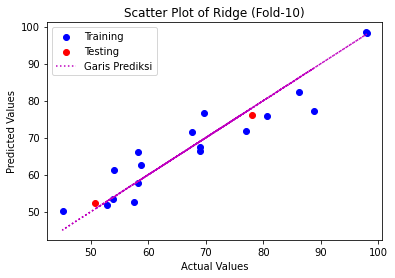

Rata-rata:
Mean MSE: 22.712329002033563
Mean MAE: 3.783800407038739
Mean RMSE: 4.754821161304932
Mean R^2: 0.9035278655449342


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_r = Ridge()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_r.fit(X_train, y_train)
    y_train_pred = model_r.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_r.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Ridge Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Ridge (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Lasso

Lasso Fold-1:
MSE: 27.286643362092363
MAE: 4.404257673770617
RMSE: 5.223661872871594
R^2: 0.8876208848691409
------------------


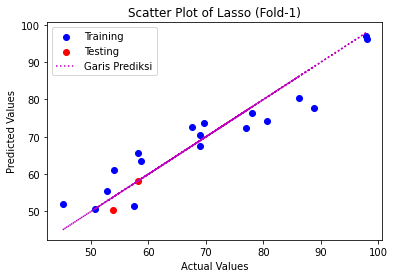

Lasso Fold-2:
MSE: 26.454813139136935
MAE: 4.248442568074102
RMSE: 5.143424262020092
R^2: 0.8934215833289026
------------------


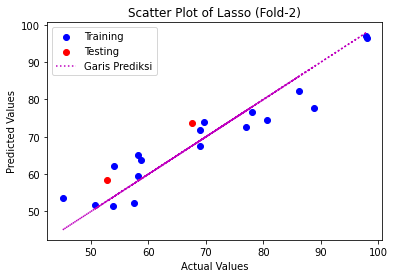

Lasso Fold-3:
MSE: 24.61273571639297
MAE: 4.094269946383445
RMSE: 4.961122425055944
R^2: 0.8813681264626894
------------------


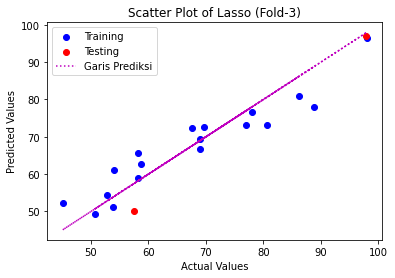

Lasso Fold-4:
MSE: 28.033773626832946
MAE: 4.3607815282583635
RMSE: 5.294692968136391
R^2: 0.8784700798787387
------------------


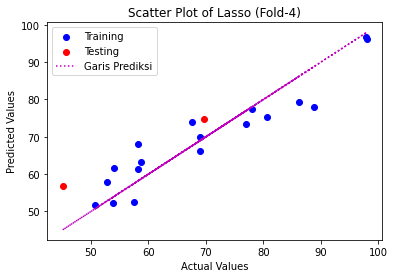

Lasso Fold-5:
MSE: 25.2835884950164
MAE: 4.056693118891752
RMSE: 5.028278879996256
R^2: 0.9003131609503026
------------------


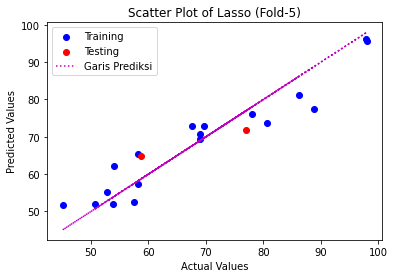

Lasso Fold-6:
MSE: 29.054126867459065
MAE: 4.536946177623183
RMSE: 5.390188017820813
R^2: 0.889457793358643
------------------


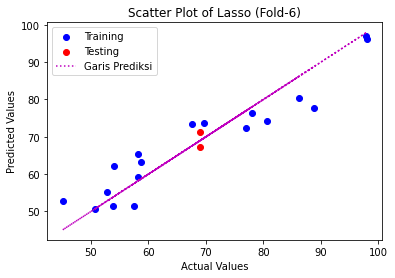

Lasso Fold-7:
MSE: 29.194644609559685
MAE: 4.41338950294672
RMSE: 5.403206881987741
R^2: 0.875521151544006
------------------


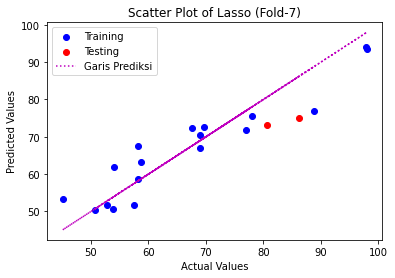

Lasso Fold-8:
MSE: 24.802884262794688
MAE: 3.861410748698895
RMSE: 4.980249417729467
R^2: 0.8804942469234416
------------------


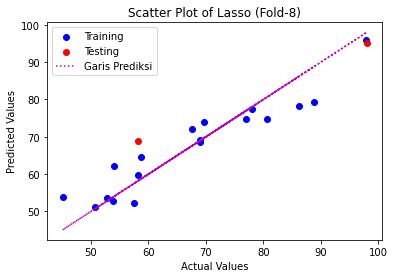

Lasso Fold-9:
MSE: 20.763463951054526
MAE: 3.9387502204483997
RMSE: 4.556694410540883
R^2: 0.9090480252878235
------------------


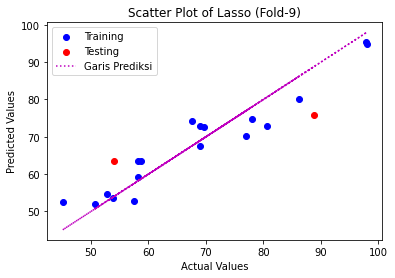

Lasso Fold-10:
MSE: 27.484248054849147
MAE: 4.414686950997585
RMSE: 5.242542136678459
R^2: 0.8855400074203699
------------------


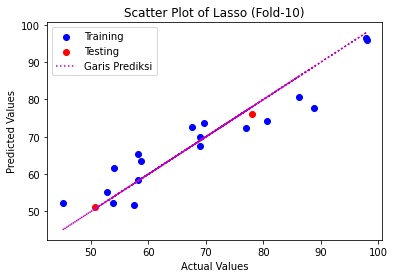

Rata-rata:
Mean MSE: 26.29709220851887
Mean MAE: 4.2329628436093065
Mean RMSE: 5.122406127283764
Mean R^2: 0.888125506002406


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_l = Lasso()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_l.fit(X_train, y_train)
    y_train_pred = model_l.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_l.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Lasso Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Lasso (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Elastic Net

ELastic Net Fold-1:
MSE: 50.55832548136069
MAE: 5.979211734021523
RMSE: 7.110437784086201
R^2: 0.7917772514304009
------------------


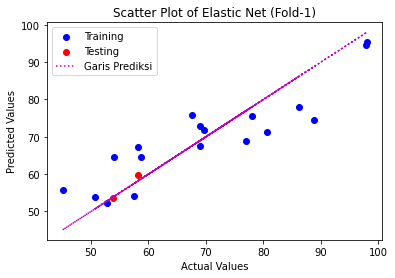

ELastic Net Fold-2:
MSE: 47.2614061361968
MAE: 5.455684465426964
RMSE: 6.874693166694554
R^2: 0.8095981321374826
------------------


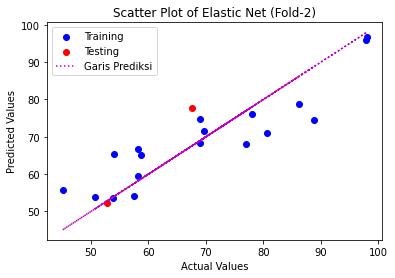

ELastic Net Fold-3:
MSE: 50.02126127334904
MAE: 5.739953645395773
RMSE: 7.072571051134731
R^2: 0.7589005948004236
------------------


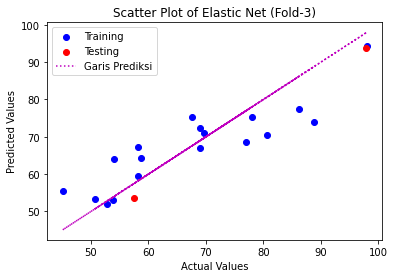

ELastic Net Fold-4:
MSE: 43.85708578349457
MAE: 5.42342404171279
RMSE: 6.6224682546233895
R^2: 0.8098740396862676
------------------


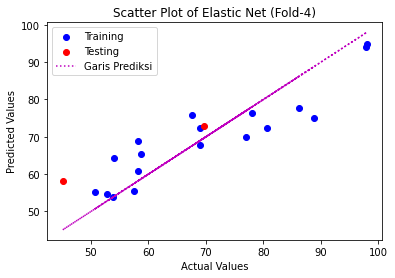

ELastic Net Fold-5:
MSE: 45.91558136468211
MAE: 5.165744552772882
RMSE: 6.776103700850667
R^2: 0.8189663951271572
------------------


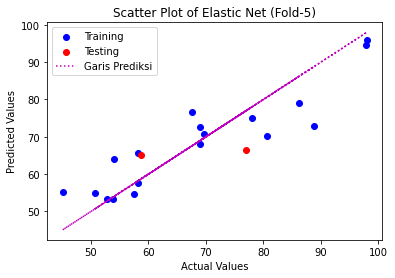

ELastic Net Fold-6:
MSE: 52.66029014013299
MAE: 5.9869392625666045
RMSE: 7.256741013714971
R^2: 0.7996434482089294
------------------


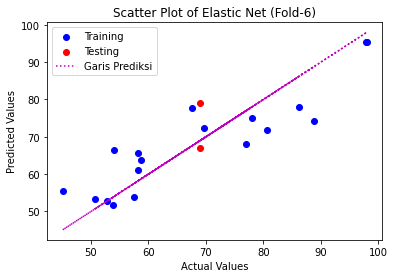

ELastic Net Fold-7:
MSE: 43.78141889179296
MAE: 5.302975862720378
RMSE: 6.6167528963830105
R^2: 0.8133267015130798
------------------


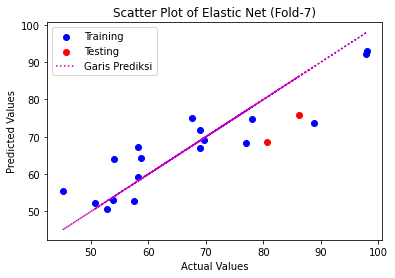

ELastic Net Fold-8:
MSE: 43.85459458510633
MAE: 5.232421311746176
RMSE: 6.622280165102223
R^2: 0.7886989151652086
------------------


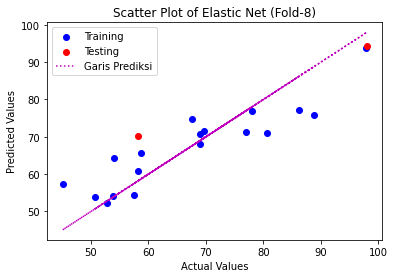

ELastic Net Fold-9:
MSE: 36.4505303705895
MAE: 4.988628768781727
RMSE: 6.037427462967112
R^2: 0.8403326282971728
------------------


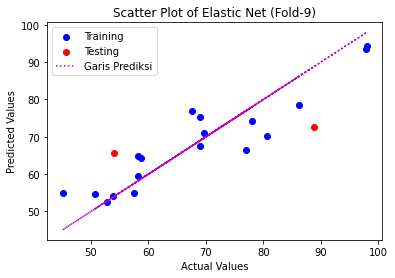

ELastic Net Fold-10:
MSE: 50.2987456831144
MAE: 5.7449256357201826
RMSE: 7.092160861339399
R^2: 0.7905275033843172
------------------


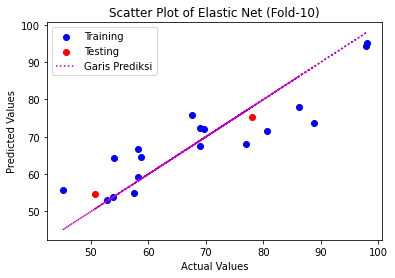

Rata-rata:
Mean MSE: 46.46592397098193
Mean MAE: 5.501990928086499
Mean RMSE: 6.808163635689626
Mean R^2: 0.8021645609750438


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_en = ElasticNet()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_en.fit(X_train, y_train)
    y_train_pred = model_en.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_en.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"ELastic Net Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Elastic Net (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


# Model Non Linear

## Model Random Forest Regressor

Random Forest Regressor Fold-1:
MSE: 7.302204266111109
MAE: 2.230838888888895
RMSE: 2.702259104177671
R^2: 0.9699261194189103
------------------


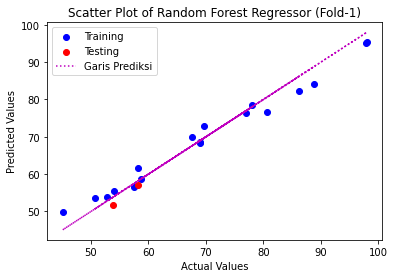

Random Forest Regressor Fold-2:
MSE: 5.575303896111169
MAE: 1.8616722222222337
RMSE: 2.361208143326456
R^2: 0.9775387919550765
------------------


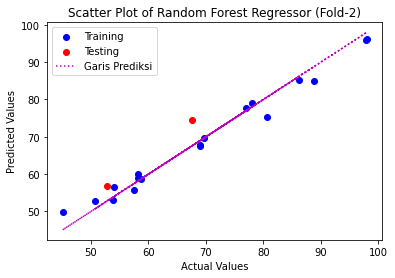

Random Forest Regressor Fold-3:
MSE: 5.020028948888931
MAE: 1.700555555555541
RMSE: 2.24054211049222
R^2: 0.975803768980399
------------------


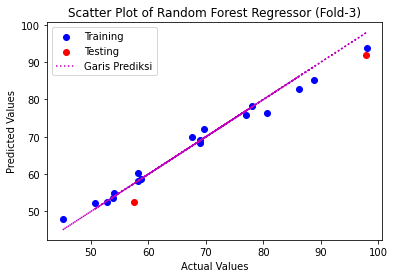

Random Forest Regressor Fold-4:
MSE: 5.126857523333347
MAE: 1.905522222222241
RMSE: 2.2642565056400628
R^2: 0.9777744304574318
------------------


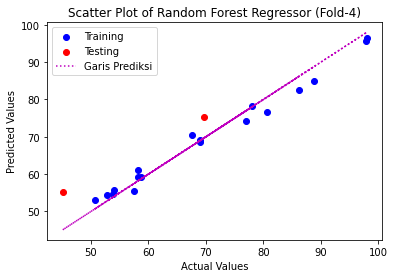

Random Forest Regressor Fold-5:
MSE: 8.224012606111128
MAE: 2.384761111111107
RMSE: 2.8677539305371247
R^2: 0.9675747838891747
------------------


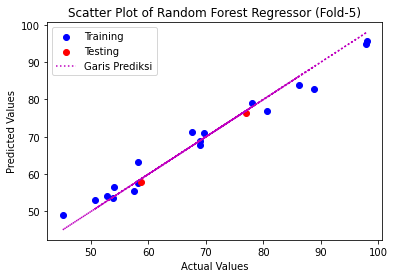

Random Forest Regressor Fold-6:
MSE: 6.988040220555602
MAE: 2.207349999999999
RMSE: 2.643490158967043
R^2: 0.9734126105526183
------------------


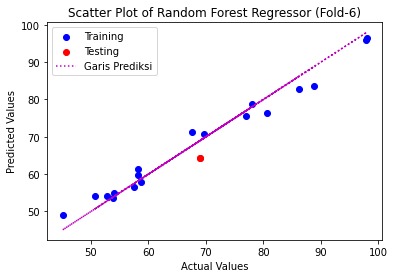

Random Forest Regressor Fold-7:
MSE: 5.362474820000026
MAE: 1.9007111111111143
RMSE: 2.3157017985915256
R^2: 0.9771357144642449
------------------


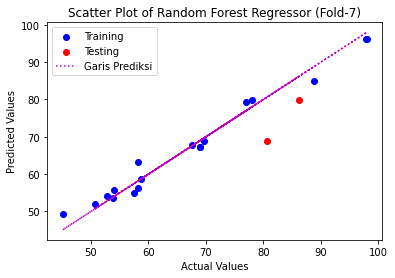

Random Forest Regressor Fold-8:
MSE: 7.173395077222239
MAE: 2.1389500000000097
RMSE: 2.6783194501818186
R^2: 0.9654370043525523
------------------


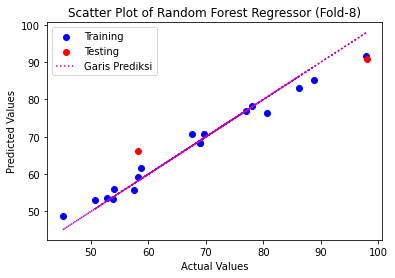

Random Forest Regressor Fold-9:
MSE: 6.056372967222291
MAE: 2.076527777777798
RMSE: 2.460969924079181
R^2: 0.9734707521702161
------------------


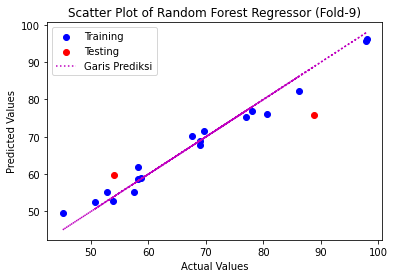

Random Forest Regressor Fold-10:
MSE: 6.427780113888895
MAE: 1.942661111111106
RMSE: 2.535306710023246
R^2: 0.973231079028578
------------------


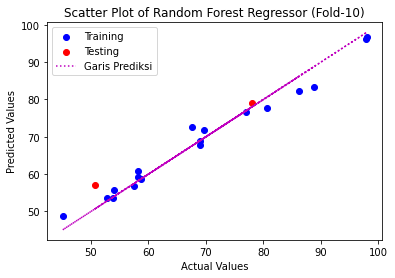

Rata-rata:
Mean MSE: 6.325647043944473
Mean MAE: 2.0349550000000045
Mean RMSE: 2.5069807836016347
Mean R^2: 0.9731305055269202


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_rf = RandomForestRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_rf.fit(X_train, y_train)
    y_train_pred = model_rf.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_rf.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Random Forest Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Random Forest Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model KNeighborsRegressor

KNeighborsRegressor Fold-1:
MSE: 161.38316488888896
MAE: 11.075333333333337
RMSE: 12.703667379496716
R^2: 0.33534890948051843
------------------


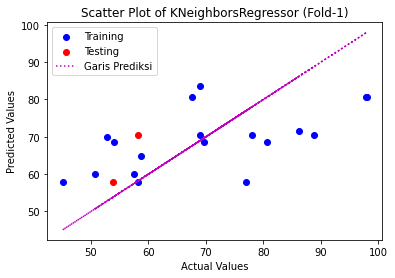

KNeighborsRegressor Fold-2:
MSE: 126.19867488888889
MAE: 9.584999999999999
RMSE: 11.233818357481525
R^2: 0.49158382314367954
------------------


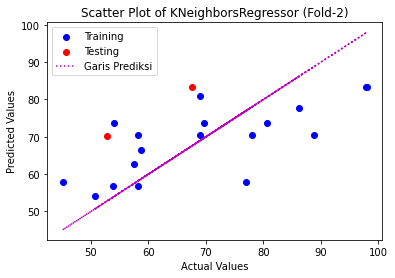

KNeighborsRegressor Fold-3:
MSE: 146.78825711111116
MAE: 10.42588888888889
RMSE: 12.115620376650597
R^2: 0.29248962183552085
------------------


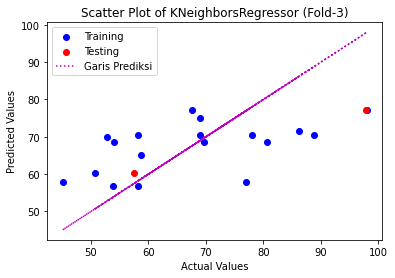

KNeighborsRegressor Fold-4:
MSE: 151.04513222222224
MAE: 11.140777777777778
RMSE: 12.290041994322975
R^2: 0.34520043223500174
------------------


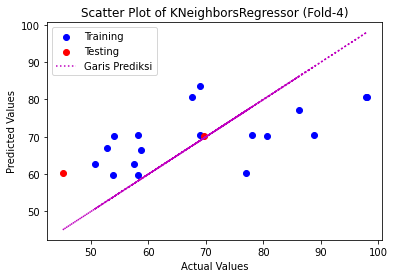

KNeighborsRegressor Fold-5:
MSE: 144.43668555555556
MAE: 10.43988888888889
RMSE: 12.01818145792264
R^2: 0.43052242648679084
------------------


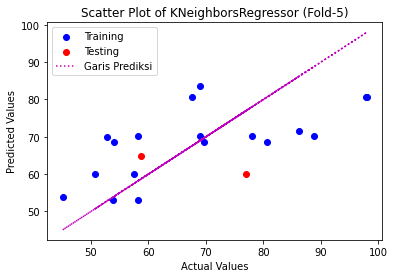

KNeighborsRegressor Fold-6:
MSE: 152.6765473333334
MAE: 10.729444444444447
RMSE: 12.35623516016644
R^2: 0.4191116972262925
------------------


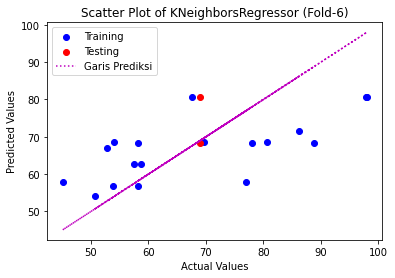

KNeighborsRegressor Fold-7:
MSE: 136.808008888889
MAE: 9.92666666666667
RMSE: 11.696495581535906
R^2: 0.4166839968837992
------------------


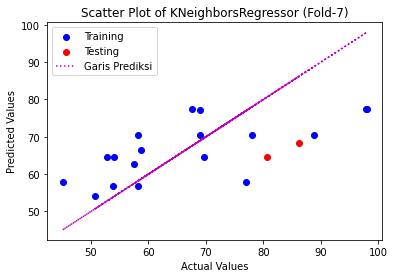

KNeighborsRegressor Fold-8:
MSE: 144.57443844444452
MAE: 10.371444444444446
RMSE: 12.02391111263072
R^2: 0.30340854882588053
------------------


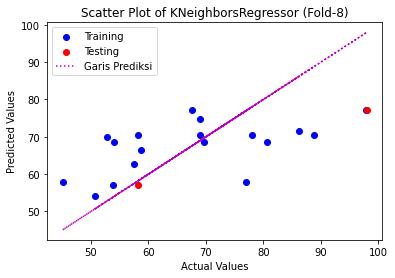

KNeighborsRegressor Fold-9:
MSE: 113.52771822222228
MAE: 8.810222222222224
RMSE: 10.654938677543962
R^2: 0.5027048385944174
------------------


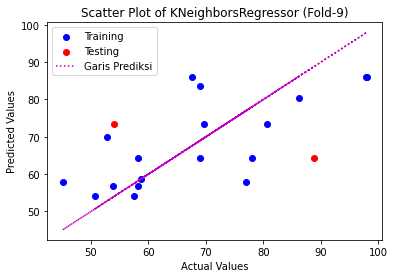

KNeighborsRegressor Fold-10:
MSE: 160.82419800000005
MAE: 11.048111111111112
RMSE: 12.6816480790156
R^2: 0.33023685156060933
------------------


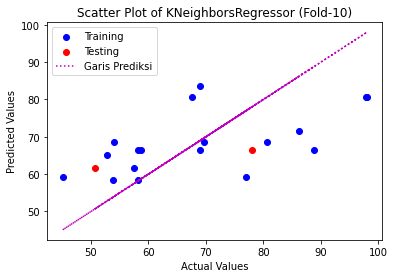

Rata-rata:
Mean MSE: 143.82628255555562
Mean MAE: 10.35527777777778
Mean RMSE: 11.97745581767671
Mean R^2: 0.38672911462725107


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model KNN
model_knn = KNeighborsRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_knn.fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_knn.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"KNeighborsRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of KNeighborsRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model NuSVR

NuSVR Fold-1:
MSE: 240.96611839368174
MAE: 12.847979733103383
RMSE: 15.523083404842021
R^2: 0.00758921490432507
------------------


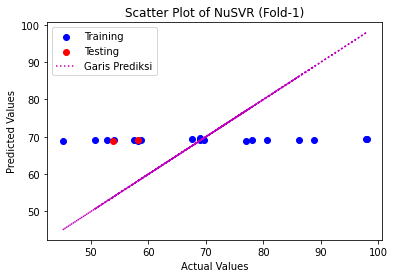

NuSVR Fold-2:
MSE: 243.97629920857267
MAE: 13.262219306596059
RMSE: 15.619740689543239
R^2: 0.017093504378012825
------------------


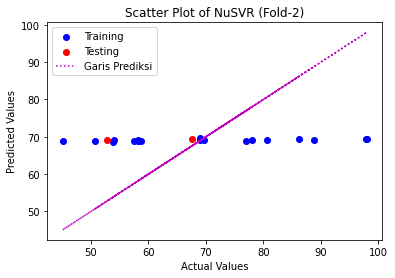

NuSVR Fold-3:
MSE: 207.91231671071662
MAE: 12.152887935081244
RMSE: 14.41916491031005
R^2: -0.002124588956082807
------------------


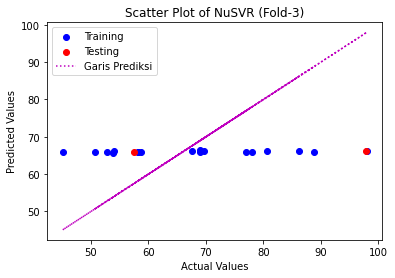

NuSVR Fold-4:
MSE: 228.0322771167626
MAE: 12.936223611960656
RMSE: 15.100737634856205
R^2: 0.011451515876413687
------------------


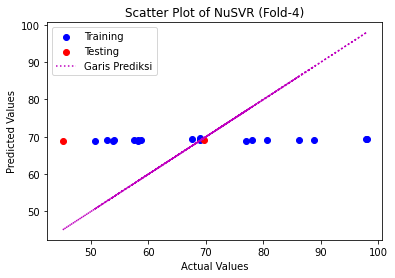

NuSVR Fold-5:
MSE: 251.65346496201832
MAE: 13.187600022667334
RMSE: 15.863589283703051
R^2: 0.007793594532193859
------------------


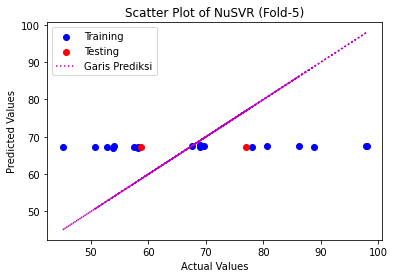

NuSVR Fold-6:
MSE: 260.5000640003027
MAE: 14.04503279257865
RMSE: 16.140014374228503
R^2: 0.008875674145268797
------------------


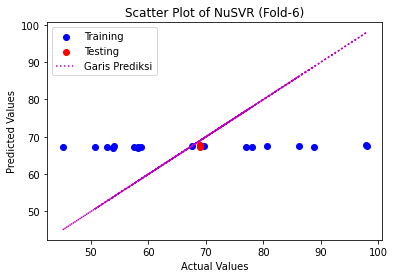

NuSVR Fold-7:
MSE: 234.08532126535385
MAE: 12.4494371782972
RMSE: 15.299847099410956
R^2: 0.0019172481373075367
------------------


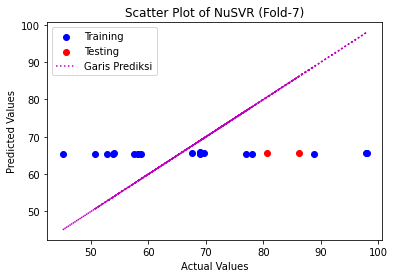

NuSVR Fold-8:
MSE: 207.87014973617377
MAE: 12.184962041008152
RMSE: 14.417702651122118
R^2: -0.0015641133971631138
------------------


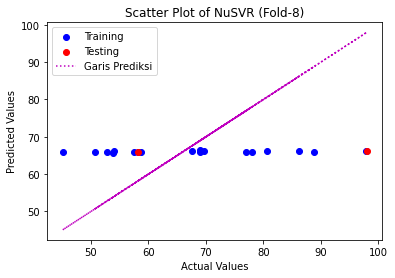

NuSVR Fold-9:
MSE: 223.21584473557152
MAE: 12.217921972578708
RMSE: 14.940409791420432
R^2: 0.02222856872031087
------------------


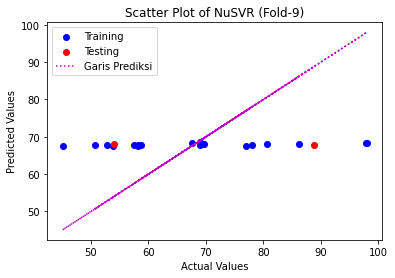

NuSVR Fold-10:
MSE: 236.67256303005493
MAE: 12.77383665302906
RMSE: 15.384165984220754
R^2: 0.014361253247289985
------------------


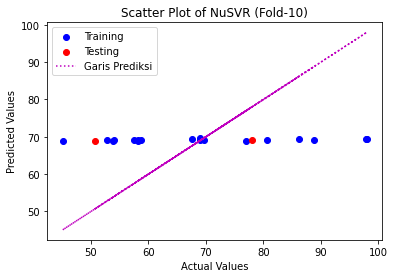

Rata-rata:
Mean MSE: 233.48844191592084
Mean MAE: 12.805810124690044
Mean RMSE: 15.270845582365732
Mean R^2: 0.008762187158787672


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model nu
model_nu = NuSVR()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_nu.fit(X_train, y_train)
    y_train_pred = model_nu.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_nu.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"NuSVR Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of NuSVR (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Decision Tree Regressor

Decision Tree Regressor Fold-1:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


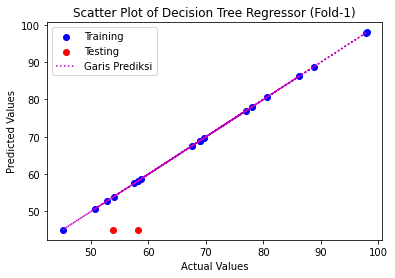

Decision Tree Regressor Fold-2:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


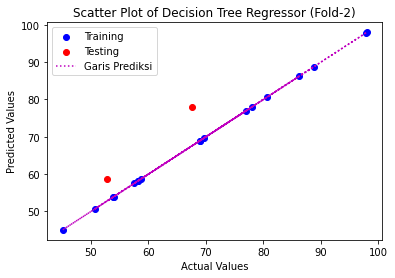

Decision Tree Regressor Fold-3:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


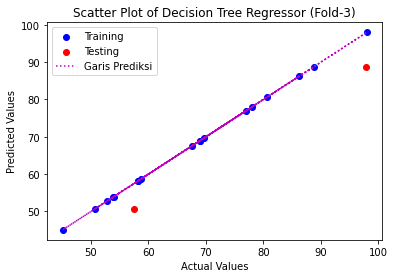

Decision Tree Regressor Fold-4:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


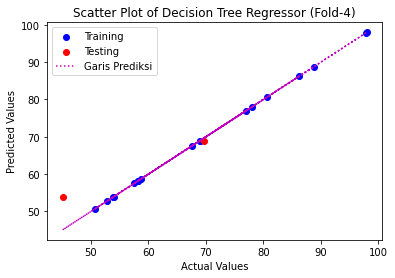

Decision Tree Regressor Fold-5:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


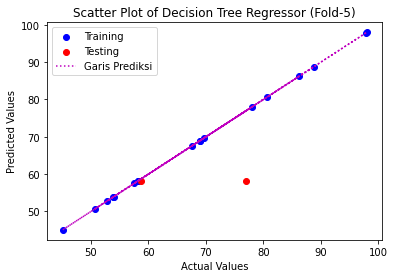

Decision Tree Regressor Fold-6:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


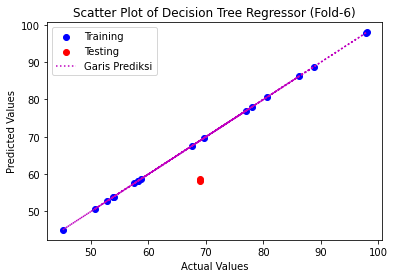

Decision Tree Regressor Fold-7:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


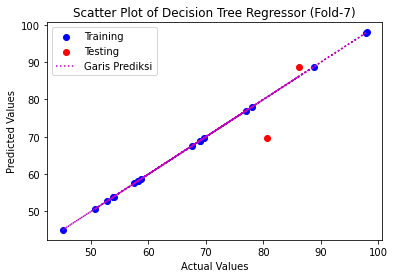

Decision Tree Regressor Fold-8:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


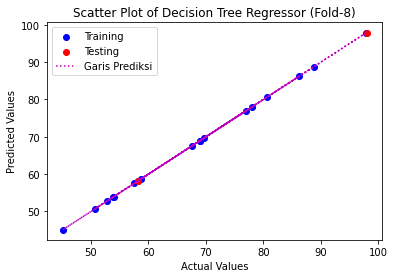

Decision Tree Regressor Fold-9:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


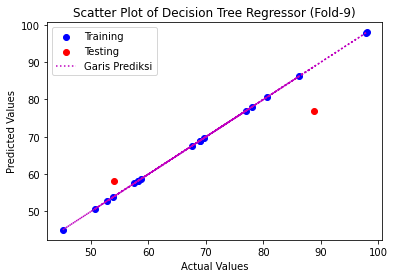

Decision Tree Regressor Fold-10:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


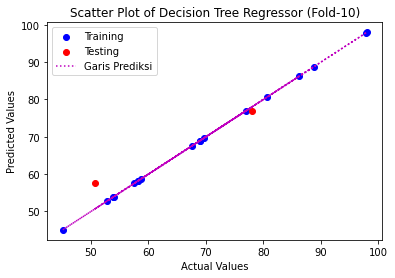

Rata-rata:
Mean MSE: 0.0
Mean MAE: 0.0
Mean RMSE: 0.0
Mean R^2: 1.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model nu
model_dt = DecisionTreeRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_dt.fit(X_train, y_train)
    y_train_pred = model_dt.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_dt.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Decision Tree Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Decision Tree Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Gradient Boosting Regressor

Gradient Boosting Regressor Fold-1:
MSE: 8.584387858333308
MAE: 2.2826277777777753
RMSE: 2.929912602507677
R^2: 0.9646454897856805
------------------


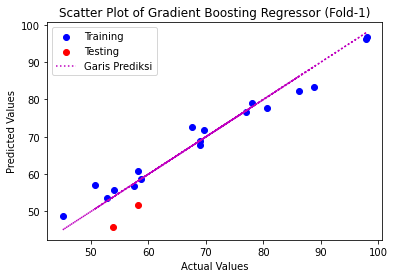

Gradient Boosting Regressor Fold-2:
MSE: 7.2100606183332605
MAE: 2.020749999999987
RMSE: 2.685155604119296
R^2: 0.9709528530493464
------------------


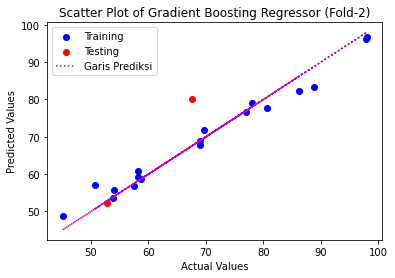

Gradient Boosting Regressor Fold-3:
MSE: 8.497509544999986
MAE: 2.235038888888884
RMSE: 2.9150488066239966
R^2: 0.9590425262213694
------------------


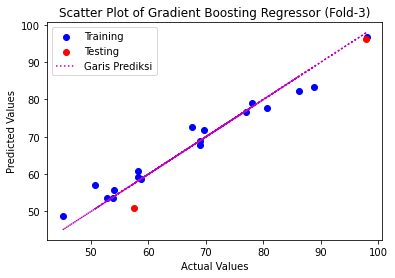

Gradient Boosting Regressor Fold-4:
MSE: 7.532514103333309
MAE: 2.0083777777777736
RMSE: 2.7445426036651916
R^2: 0.9673456078558701
------------------


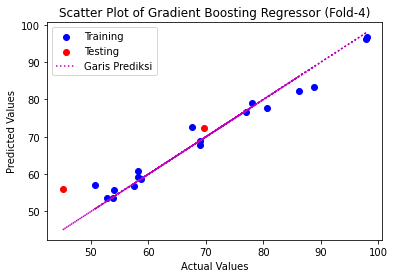

Gradient Boosting Regressor Fold-5:
MSE: 8.634011264999982
MAE: 2.3270500000000034
RMSE: 2.9383688102414887
R^2: 0.9659582621550348
------------------


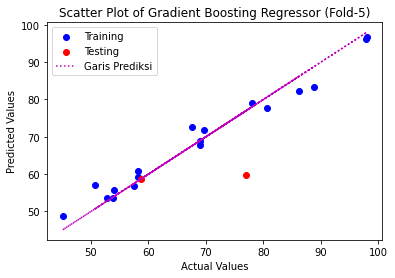

Gradient Boosting Regressor Fold-6:
MSE: 8.551243620555537
MAE: 2.270605555555548
RMSE: 2.924250950338486
R^2: 0.9674650921827304
------------------


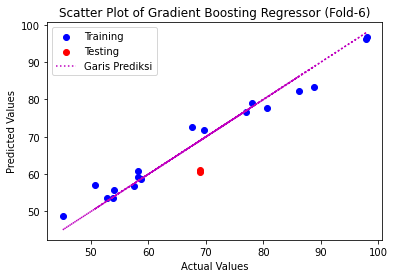

Gradient Boosting Regressor Fold-7:
MSE: 7.261494460555539
MAE: 1.9623944444444388
RMSE: 2.694716025958123
R^2: 0.9690387576006473
------------------


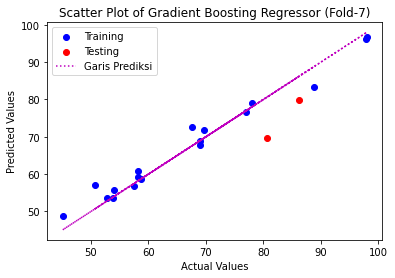

Gradient Boosting Regressor Fold-8:
MSE: 8.17337295333331
MAE: 2.133233333333327
RMSE: 2.8589111482054332
R^2: 0.9606188909477412
------------------


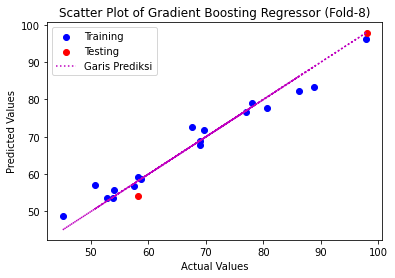

Gradient Boosting Regressor Fold-9:
MSE: 6.882230811666679
MAE: 1.9597611111111126
RMSE: 2.6234006197427564
R^2: 0.9698531765113172
------------------


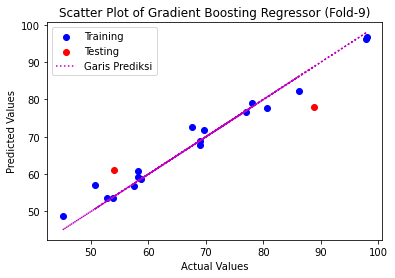

Gradient Boosting Regressor Fold-10:
MSE: 6.427780113888895
MAE: 1.942661111111106
RMSE: 2.535306710023246
R^2: 0.973231079028578
------------------


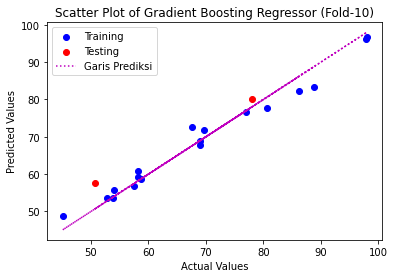

Rata-rata:
Mean MSE: 7.775460534999981
Mean MAE: 2.1142499999999957
Mean RMSE: 2.784961388142569
Mean R^2: 0.9668151735338315


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model gbr
model_gbr = GradientBoostingRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_gbr.fit(X_train, y_train)
    y_train_pred = model_rf.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_gbr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Gradient Boosting Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Gradient Boosting Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Orthogonal Matching Pursuit

Orthogonal Matching Pursuit Fold-1:
MSE: 202.3344358028447
MAE: 12.606408664154888
RMSE: 14.224430948296128
R^2: 0.166692489277959
------------------


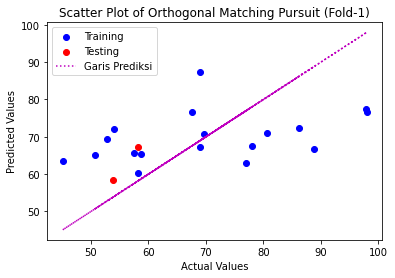

Orthogonal Matching Pursuit Fold-2:
MSE: 185.9443821521828
MAE: 11.765856595786085
RMSE: 13.636142495302064
R^2: 0.25088649334108903
------------------


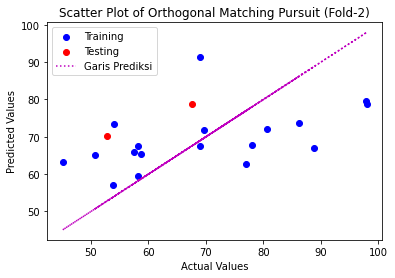

Orthogonal Matching Pursuit Fold-3:
MSE: 177.92494110364748
MAE: 11.553340630090913
RMSE: 13.338850816455198
R^2: 0.14241271854705118
------------------


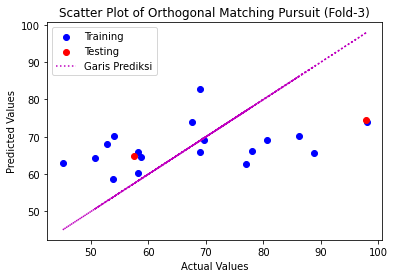

Orthogonal Matching Pursuit Fold-4:
MSE: 188.81934201120413
MAE: 12.339330877814406
RMSE: 13.741155046472771
R^2: 0.18144450128517486
------------------


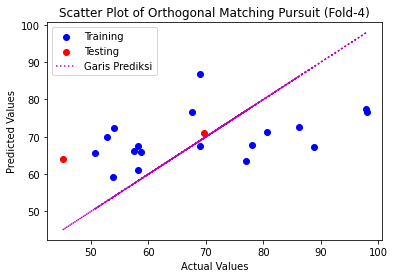

Orthogonal Matching Pursuit Fold-5:
MSE: 192.1631447533233
MAE: 11.84245698362962
RMSE: 13.862292189725453
R^2: 0.24234898514963232
------------------


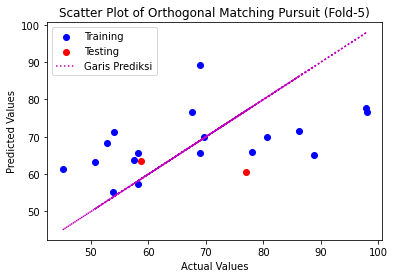

Orthogonal Matching Pursuit Fold-6:
MSE: 170.8719963517974
MAE: 11.614294714503892
RMSE: 13.071801572537636
R^2: 0.34988349104040717
------------------


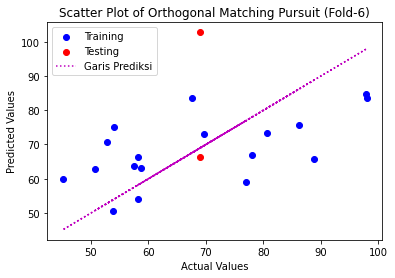

Orthogonal Matching Pursuit Fold-7:
MSE: 187.94531439772754
MAE: 11.463422034444115
RMSE: 13.709314877036253
R^2: 0.1986469908502262
------------------


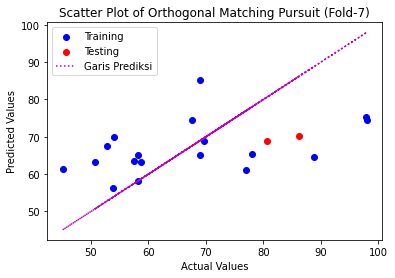

Orthogonal Matching Pursuit Fold-8:
MSE: 178.3926119972238
MAE: 11.753995927315195
RMSE: 13.356369716252384
R^2: 0.14046514856331493
------------------


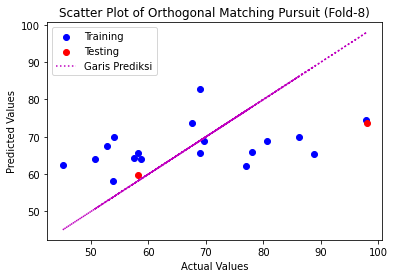

Orthogonal Matching Pursuit Fold-9:
MSE: 160.09690515052722
MAE: 10.754869063157546
RMSE: 12.652940573263088
R^2: 0.2987138512594406
------------------


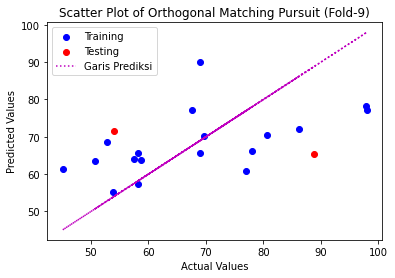

Orthogonal Matching Pursuit Fold-10:
MSE: 189.9554018399389
MAE: 11.825856413475186
RMSE: 13.782430911850742
R^2: 0.20891800126130844
------------------


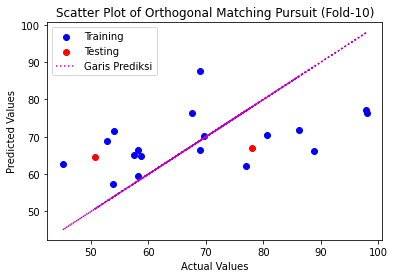

Rata-rata:
Mean MSE: 183.44484755604174
Mean MAE: 11.751983190437183
Mean RMSE: 13.537572914719172
Mean R^2: 0.21804126705756038


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model omp
model_omp = OrthogonalMatchingPursuit()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_omp.fit(X_train, y_train)
    y_train_pred = model_omp.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_omp.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Orthogonal Matching Pursuit Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Orthogonal Matching Pursuit (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Kernel Ridge

Kernel Ridge Fold-1:
MSE: 28.406325709769735
MAE: 4.14170847115854
RMSE: 5.329758503888308
R^2: 0.8830095110995687
------------------


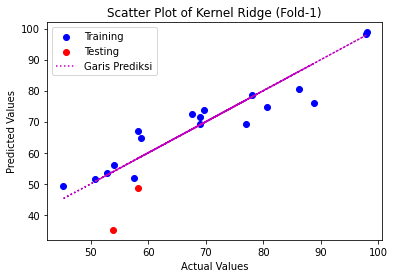

Kernel Ridge Fold-2:
MSE: 34.40994638360467
MAE: 5.056118905755657
RMSE: 5.865999180327651
R^2: 0.8613727647965695
------------------


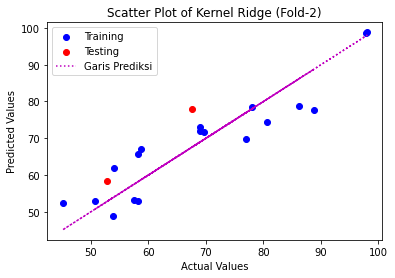

Kernel Ridge Fold-3:
MSE: 35.78135408189661
MAE: 5.004801202322852
RMSE: 5.9817517569602145
R^2: 0.8275360723265681
------------------


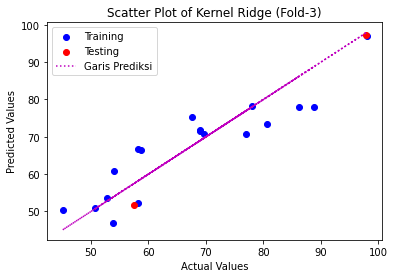

Kernel Ridge Fold-4:
MSE: 36.53760195324904
MAE: 5.186313097895385
RMSE: 6.0446341455251895
R^2: 0.8416049189128577
------------------


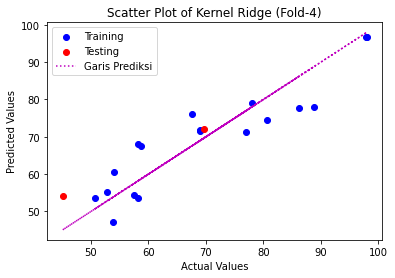

Kernel Ridge Fold-5:
MSE: 33.015311270191695
MAE: 4.666697297082412
RMSE: 5.745895167003284
R^2: 0.8698289199962267
------------------


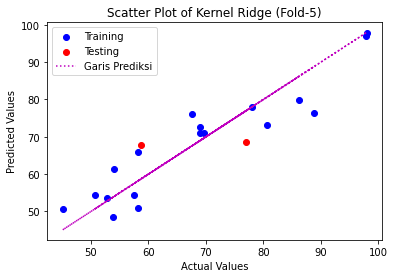

Kernel Ridge Fold-6:
MSE: 36.51375927044737
MAE: 5.05772776469147
RMSE: 6.0426616048267485
R^2: 0.8610761376192904
------------------


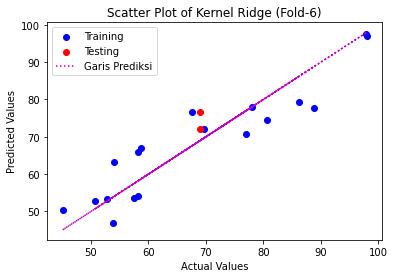

Kernel Ridge Fold-7:
MSE: 30.46725286725576
MAE: 4.559862306462929
RMSE: 5.519714926267095
R^2: 0.8700950601299072
------------------


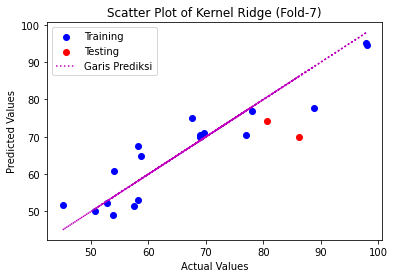

Kernel Ridge Fold-8:
MSE: 32.55745711485635
MAE: 4.904461631306132
RMSE: 5.705914222528792
R^2: 0.8431310088962104
------------------


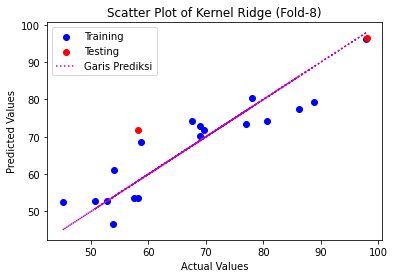

Kernel Ridge Fold-9:
MSE: 29.712306019318856
MAE: 4.736317175743411
RMSE: 5.450899560560519
R^2: 0.8698486479866819
------------------


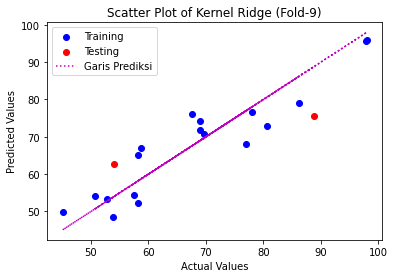

Kernel Ridge Fold-10:
MSE: 37.43019721476335
MAE: 5.365302390366356
RMSE: 6.11802232872383
R^2: 0.844119435725293
------------------


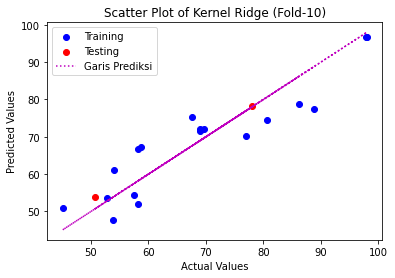

Rata-rata:
Mean MSE: 33.48315118853535
Mean MAE: 4.867931024278515
Mean RMSE: 5.780525139661163
Mean R^2: 0.8571622477489174


In [ ]:
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model kr
model_kr = KernelRidge()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_kr.fit(X_train, y_train)
    y_train_pred = model_kr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_kr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Kernel Ridge Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Kernel Ridge (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model PLSRegression

PLSRegression Fold-1:
MSE: 31.293942223245626
MAE: 4.625559483914128
RMSE: 5.594098874997261
R^2: 0.871116960436027
------------------


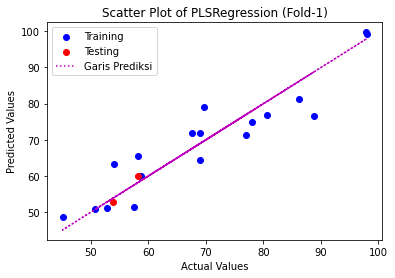

PLSRegression Fold-2:
MSE: 32.38559947318131
MAE: 4.739385834565856
RMSE: 5.6908346903755085
R^2: 0.8695282443825043
------------------


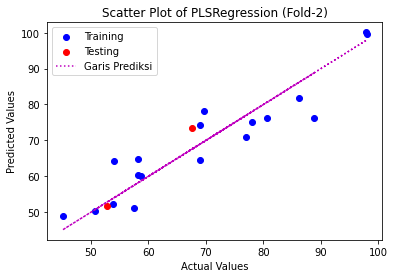

PLSRegression Fold-3:
MSE: 26.327744311835115
MAE: 4.326345760341029
RMSE: 5.131056841610227
R^2: 0.8731018904313008
------------------


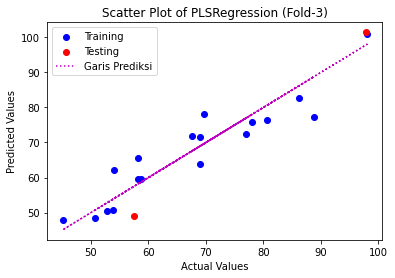

PLSRegression Fold-4:
MSE: 26.16581327062686
MAE: 4.185411360246402
RMSE: 5.115253001624344
R^2: 0.8865679219995055
------------------


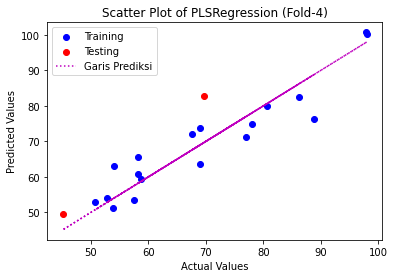

PLSRegression Fold-5:
MSE: 31.760414487293076
MAE: 4.528374916907296
RMSE: 5.6356378953312
R^2: 0.8747766628233754
------------------


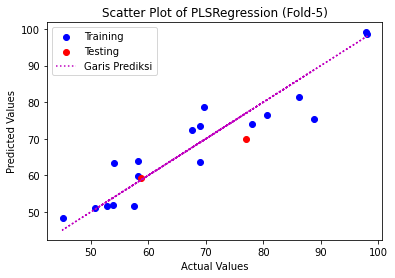

PLSRegression Fold-6:
MSE: 33.00697825423278
MAE: 4.566987551520621
RMSE: 5.745169993501739
R^2: 0.874418383748688
------------------


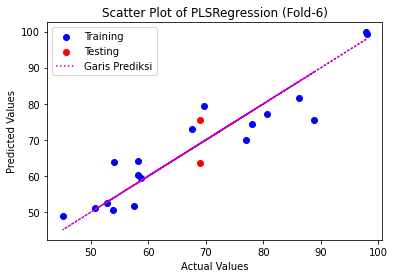

PLSRegression Fold-7:
MSE: 29.756129835530697
MAE: 4.347707994298188
RMSE: 5.454917949477398
R^2: 0.8731271154018075
------------------


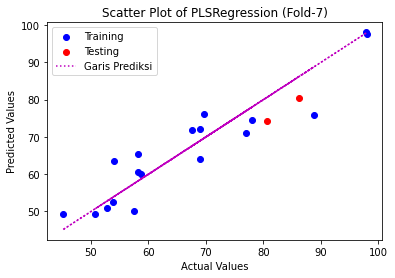

PLSRegression Fold-8:
MSE: 24.421388078407524
MAE: 3.958141887512893
RMSE: 4.941800084828151
R^2: 0.882332379469962
------------------


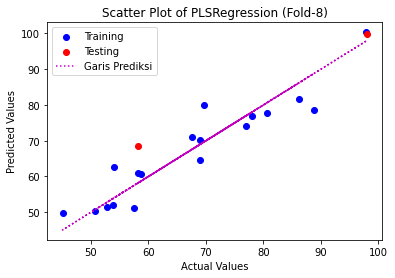

PLSRegression Fold-9:
MSE: 20.04118573839021
MAE: 3.738509168480846
RMSE: 4.476738292372049
R^2: 0.912211882238102
------------------


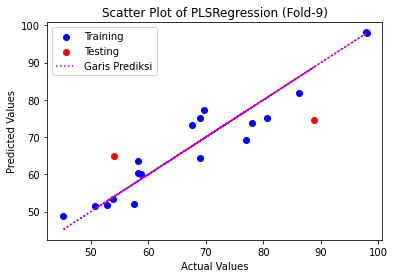

PLSRegression Fold-10:
MSE: 30.874860879996984
MAE: 4.494143488018485
RMSE: 5.556515174099409
R^2: 0.8714195731253394
------------------


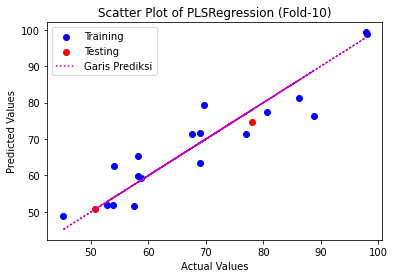

Rata-rata:
Mean MSE: 28.603405655274013
Mean MAE: 4.351056744580575
Mean RMSE: 5.334202279821729
Mean R^2: 0.8788601014056612


In [ ]:
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model plsr
model_plsr = PLSRegression()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_plsr.fit(X_train, y_train)
    y_train_pred = model_plsr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_plsr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"PLSRegression Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of PLSRegression (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model AdaBoostRegressor

AdaBoostRegressor Fold-1:
MSE: 0.46135514081789897
MAE: 0.381597222222221
RMSE: 0.6792312866895186
R^2: 0.9980999245015891
------------------


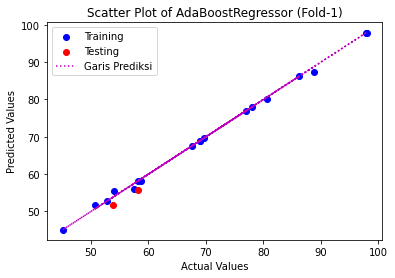

AdaBoostRegressor Fold-2:
MSE: 0.42793820833333196
MAE: 0.39086111111111066
RMSE: 0.6541698619879488
R^2: 0.9982759667801335
------------------


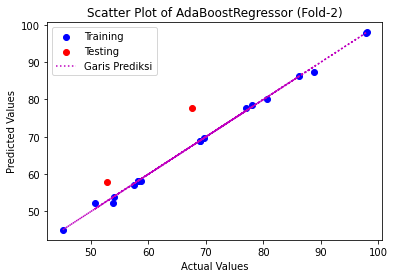

AdaBoostRegressor Fold-3:
MSE: 0.4576294981418484
MAE: 0.3997288359788354
RMSE: 0.6764831839313142
R^2: 0.9977942539433214
------------------


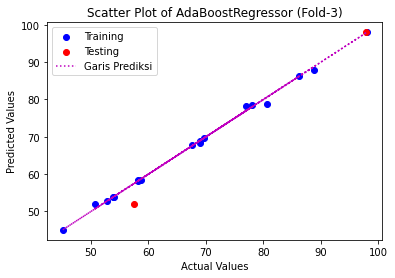

AdaBoostRegressor Fold-4:
MSE: 0.2571906635802467
MAE: 0.2582407407407403
RMSE: 0.5071396884293782
R^2: 0.9988850462582417
------------------


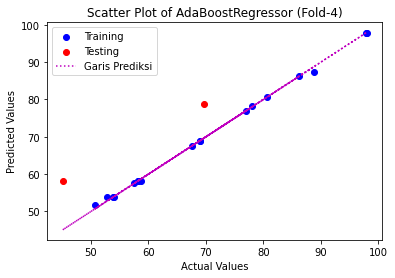

AdaBoostRegressor Fold-5:
MSE: 1.1377272019865456
MAE: 0.5679740460157122
RMSE: 1.066642959001064
R^2: 0.9955142274013339
------------------


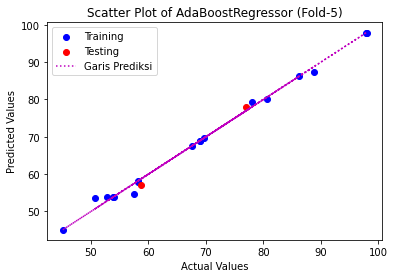

AdaBoostRegressor Fold-6:
MSE: 1.195433625000004
MAE: 0.6555277777777779
RMSE: 1.093358872923252
R^2: 0.9954517349151943
------------------


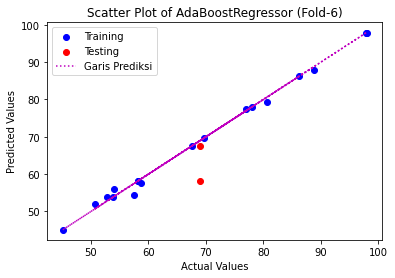

AdaBoostRegressor Fold-7:
MSE: 0.8097484081790106
MAE: 0.5326388888888872
RMSE: 0.8998602159107884
R^2: 0.9965474301627159
------------------


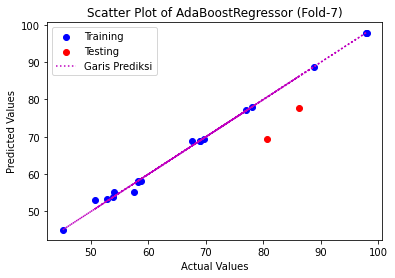

AdaBoostRegressor Fold-8:
MSE: 1.7146657604245406
MAE: 0.7925330687830692
RMSE: 1.3094524658896711
R^2: 0.9917383631353914
------------------


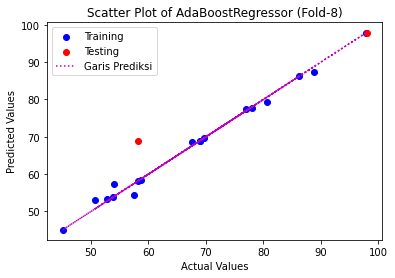

AdaBoostRegressor Fold-9:
MSE: 0.17126464159737886
MAE: 0.2492724867724855
RMSE: 0.41384132417797387
R^2: 0.9992497948613789
------------------


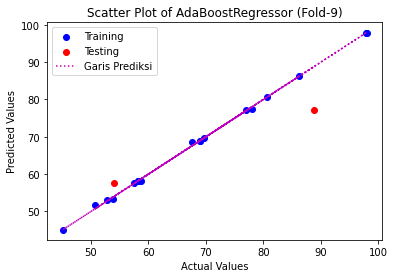

AdaBoostRegressor Fold-10:
MSE: 0.691882550068588
MAE: 0.4547530864197529
RMSE: 0.831794776413382
R^2: 0.9971186087613245
------------------


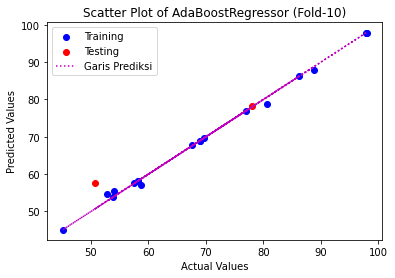

Rata-rata:
Mean MSE: 0.7324835698129393
Mean MAE: 0.46831272647105926
Mean RMSE: 0.8131974635354291
Mean R^2: 0.9968675350720625


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model abr
model_abr = AdaBoostRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_abr.fit(X_train, y_train)
    y_train_pred = model_abr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_abr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"AdaBoostRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of AdaBoostRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Model Bagging Regressor

BaggingRegressor Fold-1:
MSE: 6.892903166666661
MAE: 2.1775000000000024
RMSE: 2.625433900647027
R^2: 0.9716118121135843
------------------


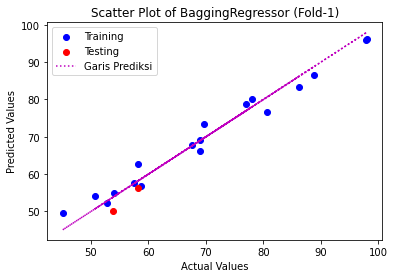

BaggingRegressor Fold-2:
MSE: 6.702324777777771
MAE: 2.134444444444443
RMSE: 2.588884852166618
R^2: 0.972998366721621
------------------


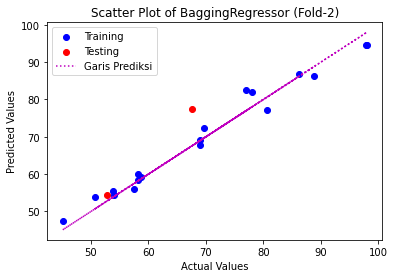

BaggingRegressor Fold-3:
MSE: 7.485564333333331
MAE: 2.233777777777778
RMSE: 2.7359759380033535
R^2: 0.963920039950864
------------------


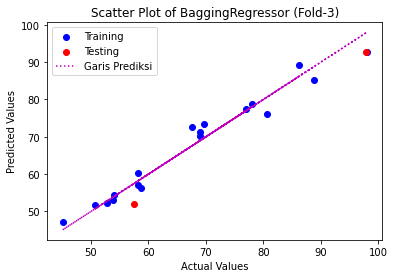

BaggingRegressor Fold-4:
MSE: 10.118600333333308
MAE: 2.4983333333333295
RMSE: 3.180974745786786
R^2: 0.9561346001213362
------------------


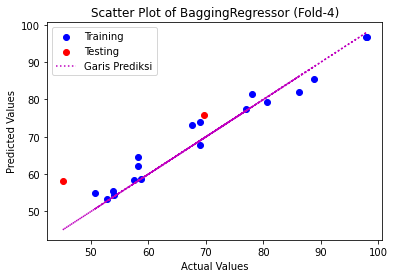

BaggingRegressor Fold-5:
MSE: 10.593341722222213
MAE: 2.389833333333334
RMSE: 3.2547414217142063
R^2: 0.9582331142800493
------------------


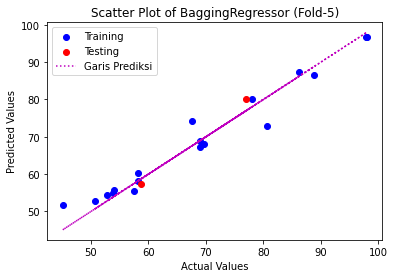

BaggingRegressor Fold-6:
MSE: 13.119727777777783
MAE: 2.557222222222224
RMSE: 3.622116477665756
R^2: 0.9500833852035734
------------------


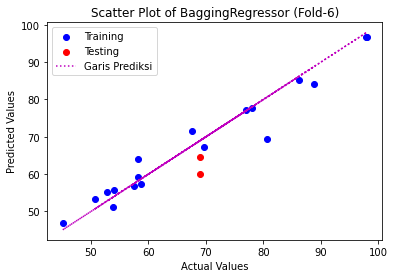

BaggingRegressor Fold-7:
MSE: 5.240892166666656
MAE: 1.7122777777777745
RMSE: 2.2892994925668106
R^2: 0.9776541132624342
------------------


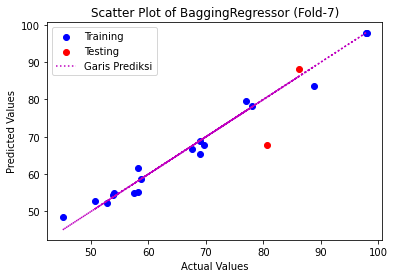

BaggingRegressor Fold-8:
MSE: 8.805406888888895
MAE: 2.440666666666668
RMSE: 2.9673905858327605
R^2: 0.9575736123971409
------------------


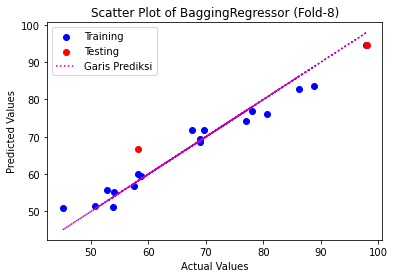

BaggingRegressor Fold-9:
MSE: 13.349337333333315
MAE: 2.8913333333333315
RMSE: 3.6536744974523
R^2: 0.9415247574090844
------------------


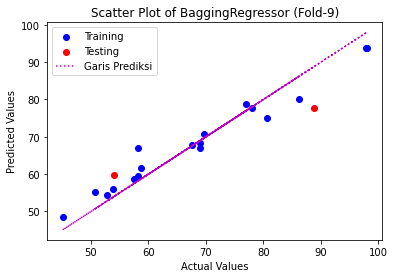

BaggingRegressor Fold-10:
MSE: 9.848662722222217
MAE: 2.423055555555555
RMSE: 3.1382579119986644
R^2: 0.9589845841932741
------------------


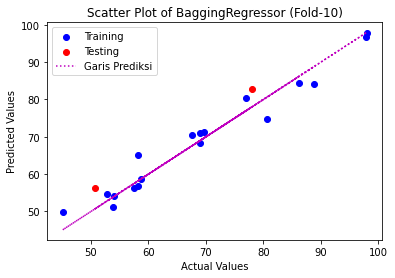

Rata-rata:
Mean MSE: 9.215676122222215
Mean MAE: 2.345844444444444
Mean RMSE: 3.005674982383428
Mean R^2: 0.9608718385652961


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model br
model_br = BaggingRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_br.fit(X_train, y_train)
    y_train_pred = model_br.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_br.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"BaggingRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of BaggingRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


# Model Final AdaboostRegressor

## Feature Importance

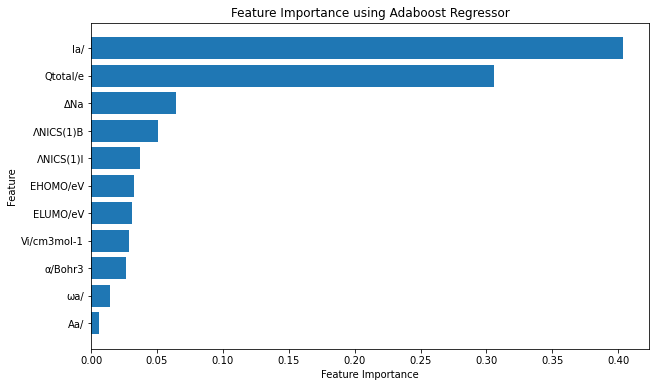

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# Contoh data
X = df.drop("IE exp (%)",axis=1)
y = df["IE exp (%)"]

# Inisialisasi model abr
model_abr = AdaBoostRegressor()

# Fit model pada data
model_abr.fit(X, y)

# Mengambil fitur importance dari model
feature_importance = model_abr.feature_importances_

# Mengurutkan indeks berdasarkan fitur importance
sorted_idx = np.argsort(feature_importance)

# Mengambil nama fitur dari indeks yang diurutkan
feature_names = X.columns[sorted_idx]

# Visualisasi fitur importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Adaboost Regressor')
plt.show()